<a href="https://colab.research.google.com/github/krishbhowmick/Machine_Learning/blob/master/05_DescisionTree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [92]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [93]:
path = '/content/drive/My Drive/DataScience_DataSet/IITB_Data/Advertising.txt'  # ADD path/to/dataset

# Convert the data to a Pandas data frame
data = pd.read_csv(path)
#shape of the data
data.shape

(200, 5)

In [94]:
#first five rows of the data
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [95]:
#checking missing values in the data
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [96]:
x = data.drop(['Unnamed: 0','sales'], axis=1)
#x = mydata(['newspaper','TV','radio'], axis=1)
y = data['sales']

In [97]:
X=x.values
X.shape

(200, 3)

In [98]:
Y=y.values
Y.shape

(200,)

In [99]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [100]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, random_state = 101,  test_size=0.25)   #stratify=y,

In [101]:
#shape of training set
X_train.shape, y_train.shape

((150, 3), (150,))

In [102]:
#shape of validation set
X_valid.shape, y_valid.shape

((50, 3), (50,))

In [103]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [104]:
#creating the decision tree function
dt_model = DecisionTreeRegressor(random_state=10)

In [105]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [106]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [107]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.9542902311694041

In [108]:
#predictions on validation set
dt_model.predict(X_valid)

array([13.6, 17.4, 13.2, 16. ,  9.5,  6.7, 20.8, 17.4, 10.1, 19.4, 10.8,
       14.7, 12.2, 21.2, 16.9, 10.1, 12.7,  8.8,  9.7, 21.8,  8.8, 18. ,
       25.4, 25.4,  9.9, 11.7, 21.4,  9.7, 14.7,  8.7,  8.5, 19.4, 11. ,
        5.3, 16.9,  8.7,  9.7,  8.8,  7.2, 10.1, 12.6, 10.1, 12.4,  8.7,
       12. , 11.3,  1.6, 15.7, 14.7, 21.2])

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
#accuracy_score(X_valid, y_valid)

In [111]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [112]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.476288,0.450266
1,2,0.800952,0.792002
2,3,0.905019,0.847542
3,4,0.959543,0.887559
4,5,0.982686,0.935128


No handles with labels found to put in legend.


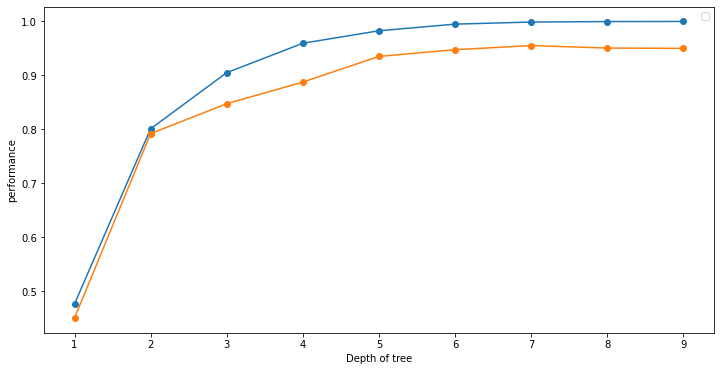

In [113]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [114]:
dt_model = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=25, random_state=10)

In [115]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=25,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [116]:
#Training score
dt_model.score(X_train, y_train)

0.9803329773017259

In [117]:
#Validation score
dt_model.score(X_valid, y_valid)

0.9334399359134629